## Reading data train

In [98]:
import pandas as pd

heartD = pd.read_csv('tubes2_HeartDisease_train.csv')
heartD_target = heartD['Column14']
heartD_data = heartD.loc[:, :'Column13']
heartD_feature_names = ['age', 'sex', 'chest-pain type', 'resting blod presure', 'serum cholestrol', 
                        'fasting blood sugar above 120 mg/dl', 'resting ECG', 'max heart rate achieved', 'exercise induced angina',
                       'ST depression induced', 'peak exercise ST segment', 'member of major vessel', 'thal']

heartD_target_names = ['absence', 'presence', 'presence', 'presence', 'presence']

print (heartD_data)

     Column1  Column2  Column3  Column4  Column5  Column6  Column7  Column8  \
0         54        1        4      125      216        0        0      140   
1         55        1        4      158      217        0        0      110   
2         54        0        3      135      304        1        0      170   
3         48        0        3      120      195        0        0      125   
4         50        1        4      120        0        0        1      156   
5         64        0        4      130      303        0        0      122   
6         63        1        4      130      308        0        0      138   
7         58        1        2      130      251        0        0      110   
8         42        1        2      150      268        0        0      136   
9         54        1        3      120      258        0        2      147   
10        58        1        4      115        0       -1        0      138   
11        49        1        3      118      149    

## Reading Data Test

In [99]:
testD = pd.read_csv('tubes2_HeartDisease_test.csv')
print (testD)

     Column1  Column2  Column3  Column4  Column5  Column6  Column7  Column8  \
0         60        1        2      160      267        1        1      157   
1         61        1        4      148      203        0        0      161   
2         54        1        4      130      242        0        0       91   
3         48        1        4      120      260        0        0      115   
4         57        0        1      130      308        0        0       98   
5         55        1        3       -1      228        0        1       -1   
6         51        1        4      140      298        0        0      122   
7         62        1        4       -1      170        0        1      120   
8         49        0        3      160      180        0        0      156   
9         67        0        3      115      564        0        2      160   
10        43        1        4      115        0        0        0      145   
11        55        1        4      145      248    

In [100]:
import numpy as np 
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=-1, strategy="median")
#print(heartD_data.dtypes)
#np.where(np.isnan(heartD_data))
imp.fit(heartD_data)
print(imp.transform(heartD_data))

[[54.  1.  4. ...  2.  0.  6.]
 [55.  1.  4. ...  2.  0.  6.]
 [54.  0.  3. ...  1.  0.  3.]
 ...
 [51.  1.  1. ...  1.  1.  3.]
 [60.  1.  4. ...  2.  0.  6.]
 [55.  1.  3. ...  2.  0.  6.]]


## Confusion Matrix Function

In [101]:
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix

# plot confusion matrix function
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Naive Bayes

In [112]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

print('Gaussian Naive Bayes:')
# fit a Naive Bayes model to the data
gnb = GaussianNB()
gnb_class = gnb.fit(heartD_data, heartD_target)
print(gnb_class)

# make predictions
expected = heartD_target
predicted = gnb_class.predict(testD)
# summarize the fit of the model

print('\n')
print('Hasil prediksi :')
print(predicted)

Gaussian Naive Bayes:
GaussianNB(priors=None, var_smoothing=1e-09)


Hasil prediksi :
[0 2 1 0 0 3 4 3 0 1 1 1 0 4 0 4 1 0 3 2 0 1 0 1 1 0 1 1 2 1 0 1 1 0 1 0 0
 0 0 0 1 0 2 1 1 1 2 2 1 1 1 0 1 1 0 1 0 4 1 0 0 0 1 4 0 0 1 0 0 0 1 0 0 1
 0 1 1 0 0 0 0 4 1 2 3 3 1 0 0 1 2 0 0 0 0 0 0 1 1 0 1 0 3 0 3 3 0 1 1 3 0
 0 2 0 0 4 0 1 0 1 3 1 0 1 1 0 2 1 3 1 0 1 2 1 1 2 3 0 3 0 0]


## Decision Tree ID3

[0 1 0 1 1 0 2 1 0 0 1 0 0 0 0 1 2 0 3 0 0 3 1 0 1 0 1 4 3 1 0 3 3 0 1 3 3
 0 1 0 1 0 1 1 2 1 2 2 3 3 0 1 2 1 0 1 0 2 1 1 0 0 2 2 1 0 3 0 0 0 1 0 2 1
 0 0 0 0 0 1 1 3 0 3 0 0 0 0 3 2 3 0 0 0 0 0 0 1 1 0 2 0 3 0 1 1 0 2 1 1 0
 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 1 3 3 1 0 1 3 0 1 1 0 0 0 1 2]


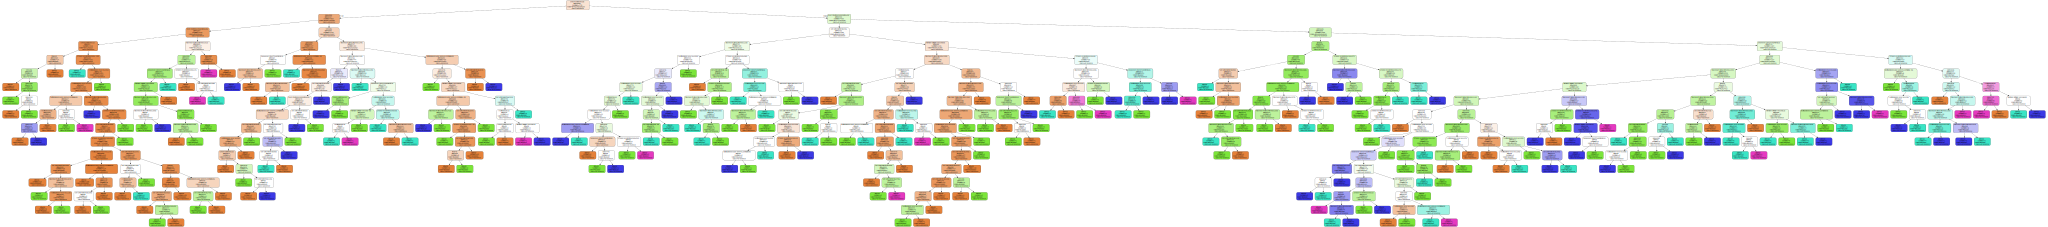

In [113]:
from sklearn import tree
import graphviz

DescTree = tree.DecisionTreeClassifier()
DescTree_class = DescTree.fit(heartD_data, heartD_target)
DescTree_predict = DescTree_class.predict(testD)
print (DescTree_predict)

dot_data = tree.export_graphviz(DescTree, out_file=None, 
                         feature_names=heartD_feature_names,  
                         class_names=heartD_target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

## K-NN

In [108]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

kneighbors = KNeighborsClassifier(n_neighbors = 1)
kneighbors_class = kneighbors.fit(heartD_data, heartD_target)
kneighbors_predict = kneighbors_class.predict(testD)
print (kneighbors_predict)

# cm_kn = confusion_matrix(testD, kneighbors_predict)
# plt.figure()
# plot_confusion_matrix(cm_kn, classes = heartD_target_names, title='Confusion Matrix')

[0 0 0 0 1 0 3 0 0 1 2 3 0 0 1 1 0 0 3 0 1 1 0 1 3 2 1 3 0 2 1 3 1 1 1 2 1
 0 0 0 1 0 0 1 0 0 0 3 1 3 1 1 1 1 1 0 0 0 0 0 0 0 3 1 0 0 1 0 0 0 1 2 1 3
 1 0 1 0 0 3 0 1 0 1 0 1 2 0 1 2 1 2 0 1 0 0 0 0 1 1 3 0 4 0 1 0 0 3 1 0 0
 0 2 1 0 0 0 3 0 2 1 1 0 0 3 1 0 1 3 1 0 0 3 0 3 4 0 0 1 1 1]


## MLP

In [109]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver = 'lbfgs', alpha=1e-5, hidden_layer_sizes=(10,), random_state=1)
mlp_class = mlp.fit(heartD_data, heartD_target)
mlp_predict = mlp_class.predict(testD)

print ("Prediksi : \n")
print (mlp_predict)
print ("\n")

Prediksi : 

[0 0 1 0 1 3 3 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0
 0 0 0 0 0 0 1 1 0 1 2 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 3 0 1 2 0 0 0 1 0 0 0
 0 0 2 0 0 0 0 3 0 2 3 3 2 0 1 3 0 1 0 3 0 0 0 0 0 0 1 0 3 0 3 3 0 0 1 2 0
 0 0 0 0 3 0 1 0 0 3 0 0 0 1 0 0 1 3 1 0 0 3 1 1 3 3 0 3 0 0]


